### Crop Suggestion

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Reading the data

In [31]:
df = pd.read_csv("crop dataset.csv")
df

,Soil type,temperature,humidity,ph,rainfall,label
0,Alluvial,20.879744,82.002744,6.502985,202.935536,rice
1,Alluvial,21.770462,80.319644,7.038096,226.655537,rice
2,Alluvial,23.004459,82.320763,7.840207,263.964248,rice
3,Alluvial,26.491096,80.158363,6.980401,242.864034,rice
4,Alluvial,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
3095,Black,25.287846,89.636679,6.765095,58.286977,watermelon
3096,Black,26.638386,84.695469,6.189214,48.324286,watermelon
3097,Black,25.331045,84.305338,6.904242,41.532187,watermelon
3098,Black,26.897502,83.892415,6.463271,43.971937,watermelon


#### EDA

In [32]:
df.isnull().sum()

Soil type      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [33]:
df.info() #there no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil type    3100 non-null   object 
 1   temperature  3100 non-null   float64
 2   humidity     3100 non-null   float64
 3   ph           3100 non-null   float64
 4   rainfall     3100 non-null   float64
 5   label        3100 non-null   object 
dtypes: float64(4), object(2)
memory usage: 145.4+ KB


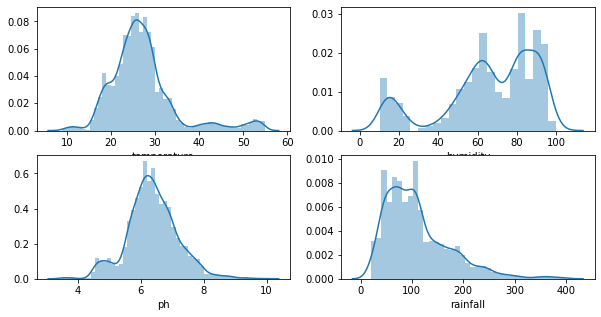

In [34]:
#Distrubtion of numberical columns
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
sns.distplot(df['temperature'],kde = True, ax=ax[0][0])
sns.distplot(df['humidity'],kde = True, ax=ax[0][1])
sns.distplot(df['ph'],kde = True, ax=ax[1][0])
sns.distplot(df['rainfall'],kde = True, ax=ax[1][1])

In [35]:
df.corr()

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


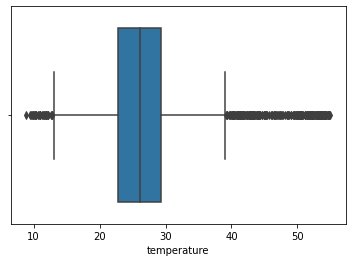

In [36]:
sns.boxplot(df['temperature'])

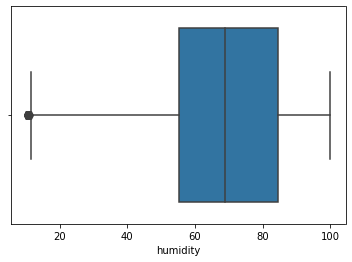

In [37]:
sns.boxplot(df['humidity'])

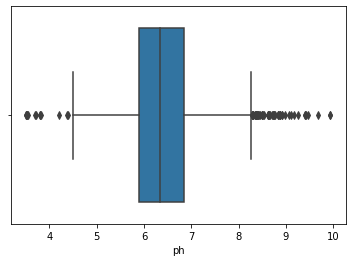

In [38]:
sns.boxplot(df['ph'])

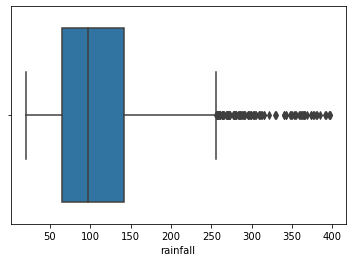

In [39]:
sns.boxplot(df['rainfall']) ## As there are lot of outliers do not remove them

In [40]:
s = pd.Categorical(df['Soil type'])
s.categories

Index(['Alluvial', 'Arid and Desert', 'Black', 'Black cotton', 'Clay',
       'Clay loam', 'Drained loam', 'Dry sandy ', 'Gravelly sand',
       'Heavy clay', 'Heavy cotton', 'Laterite', 'Light sandy', 'Loam',
       'Medium textured ', 'Medium textured clay', 'Red', 'Red ',
       'Red laterite', 'River basins', 'Sandy', 'Sandy clay loam',
       'Sandy loam', 'Sandy loam ', 'Teelah', 'Well drained', 'clay',
       'loamy sand'],
      dtype='object')

##### Converting Categorical column 

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Soil type'] = labelencoder.fit_transform(df['Soil type'])
df

,Soil type,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,0,21.770462,80.319644,7.038096,226.655537,rice
2,0,23.004459,82.320763,7.840207,263.964248,rice
3,0,26.491096,80.158363,6.980401,242.864034,rice
4,0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
3095,2,25.287846,89.636679,6.765095,58.286977,watermelon
3096,2,26.638386,84.695469,6.189214,48.324286,watermelon
3097,2,25.331045,84.305338,6.904242,41.532187,watermelon
3098,2,26.897502,83.892415,6.463271,43.971937,watermelon


### Data Normalization

In [42]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['label'],axis=1))
X.shape



(3100, 5)

In [43]:
Y = df['label']
Y.shape

(3100,)

### Test Train split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
modelClassifier = DecisionTreeClassifier(criterion='gini',random_state=0)
modelClassifier.fit(X_train,y_train)
y_pred = modelClassifier.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.932258064516129

### KNN with GridSearchCV

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [16]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
metric_K = ["euclidean","manhattan"]
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_K)


In [18]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10 ,verbose = 1, n_jobs = -1)
grid.fit(X,Y)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   16.3s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [19]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9229032258064516
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
ypredict = knn.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.9010752688172043

###  Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier


In [54]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [55]:
accuracy_score(y_test,y_pred)


0.9548387096774194

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)


In [33]:
accuracy_score(y_test,y_pred)

0.7548387096774194

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9655913978494624

### Random Forest with RandamizedSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features':randint(1, 5),
    'min_samples_leaf':randint(1, 9),
    'n_estimators':randint(100,250)
}
#### initial model
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model,param_distributions = params,cv = 5)

In [23]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002471AEB4670>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002471AEC2400>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002471AEC2850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002471AEC25E0>})

In [24]:
best_random = random_search.best_estimator_

In [25]:
y_pred = best_random.predict(X_test)
accuracy_score(y_test,y_pred)



0.9225806451612903

### XGBoost

In [27]:
!pip install xgboost

In [50]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_pred = clf.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.953763440860215